<div style="background-color:rgba(128, 0, 128, 0.6);border-radius:5px;display:fill"><h1 style="text-align: center;padding: 12px 0px 12px 0px;">MNIST: Multi-layer Perceptron Classifier</h1>
</div>

Problem Type: Multi-classification

## Evaluation Metric

In [1]:
# Black formatter https://black.readthedocs.io/en/stable/

! pip install nb-black > /dev/null

%load_ext lab_black

<div style="background-color:rgba(128, 0, 128, 0.6);border-radius:5px;display:fill"><h1 style="text-align: center;padding: 12px 0px 12px 0px;">Configuration</h1>
</div>

In [2]:
TARGET = "label"

<div style="background-color:rgba(128, 0, 128, 0.6);border-radius:5px;display:fill"><h1 style="text-align: center;padding: 12px 0px 12px 0px;">Import Libraries</h1>
</div>

A best practise is to include all libraries here.  However, I will put a few imports farther down where they are first used so beginners can learn with an "as needed" approach.

In [3]:
import os
import time
from pathlib import Path

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Visualization Libraries
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.metrics import f1_score

<div style="background-color:rgba(128, 0, 128, 0.6);border-radius:5px;display:fill"><h1 style="text-align: center;padding: 12px 0px 12px 0px;">Library</h1>
</div>

Creating a few functions that we will reuse in each project.

In [4]:
def read_data(path):
    data_dir = Path(path)

    train = pd.read_csv(data_dir / "train.csv")
    test = pd.read_csv(data_dir / "test.csv")
    submission_df = pd.read_csv(data_dir / "sample_submission.csv")

    print(f"train data: Rows={train.shape[0]}, Columns={train.shape[1]}")
    print(f"test data : Rows={test.shape[0]}, Columns={test.shape[1]}")
    return train, test, submission_df

In [5]:
def create_submission(model_name, target, preds, is_log_target=False):
    if is_log_target:
        #         preds = np.exp(preds)
        preds = np.expm1(preds)

    sample_submission[target] = preds
    if len(model_name) > 0:
        sample_submission.to_csv(f"submission_{model_name}.csv", index=False)
    else:
        sample_submission.to_csv(f"submission.csv", index=False)

    return sample_submission[:5]

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, f1_score


def show_scores(gt, yhat):
    f1 = f1_score(gt, yhat, average="macro")
    mse = mean_squared_error(gt, yhat)
    mae = mean_absolute_error(gt, yhat)
    rmse = np.sqrt(mse)
    #     r2_square = r2_score(gt, yhat)

    print(f"f1: {f1:.4f}")

<div style="background-color:rgba(128, 0, 128, 0.6);border-radius:5px;display:fill"><h1 style="text-align: center;padding: 12px 0px 12px 0px;">Load Train/Test Data</h1>
</div>

- train.csv - Data used to build our machine learning model
- test.csv - Data used to build our machine learning model. Does not contain the target variable
- sample_submission.csv - A file in the proper format to submit test predictions

In [7]:
train, test, sample_submission = read_data("../input/digit-recognizer")

train data: Rows=42000, Columns=785
test data : Rows=28000, Columns=784


In [8]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
FEATURES = [
    col
    for col in train.columns
    if col
    not in [
        "Id",
        TARGET,
        #         TARGET_ENC,
    ]
]

In [10]:
y = train[TARGET]
X = train[FEATURES].copy()

X_test = test[FEATURES].copy()

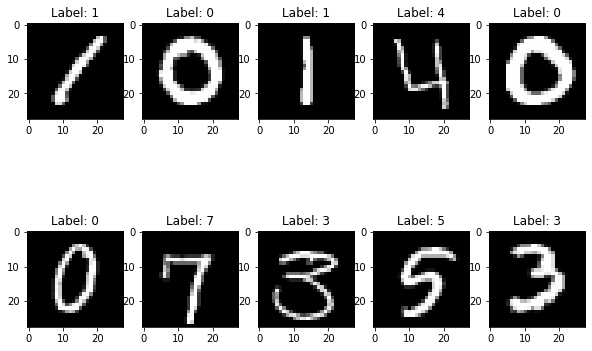

In [11]:
images = X.values.reshape(-1, 28, 28)
fig, ax = plt.subplots(2, 5, figsize=(10, 7))
ax = ax.ravel()
for i, index in enumerate(images[:10]):
    ax[i].set_title(f"Label: {y[i]}")
    ax[i].imshow(images[i], cmap="gray")

In [12]:
X.max()

pixel0       0
pixel1       0
pixel2       0
pixel3       0
pixel4       0
            ..
pixel779    62
pixel780     0
pixel781     0
pixel782     0
pixel783     0
Length: 784, dtype: int64

In [13]:
# Normalize the data
X = X / 255.0
X_test = X_test / 255.0

In [14]:
X.max()

pixel0      0.000000
pixel1      0.000000
pixel2      0.000000
pixel3      0.000000
pixel4      0.000000
              ...   
pixel779    0.243137
pixel780    0.000000
pixel781    0.000000
pixel782    0.000000
pixel783    0.000000
Length: 784, dtype: float64

In [15]:
X.sample(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
33715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
from keras.utils.np_utils import to_categorical

y = to_categorical(y)

In [17]:
y[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    test_size=0.1,
    random_state=42,
)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((37800, 784), (37800, 10), (4200, 784), (4200, 10))

<div style="background-color:rgba(128, 0, 128, 0.6);border-radius:5px;display:fill"><h1 style="text-align: center;padding: 12px 0px 12px 0px;">Create Models</h1>
</div>

In [19]:
X_train.shape[1]

784

In [20]:
X.shape[1]

784

### MLPClassifier

- https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [21]:
%%time

model = MLPClassifier(hidden_layer_sizes=(256,128),
                      batch_size=512, 
                      solver='adam', # sgd
                      max_iter=200,
                      random_state=42,
                      momentum=0.9,
                      verbose=1)
model.fit(X_train, y_train)

Iteration 1, loss = 1.80851780
Iteration 2, loss = 0.56926621
Iteration 3, loss = 0.40331618
Iteration 4, loss = 0.31946190
Iteration 5, loss = 0.26287836
Iteration 6, loss = 0.22295737
Iteration 7, loss = 0.18851293
Iteration 8, loss = 0.16414127
Iteration 9, loss = 0.14163176
Iteration 10, loss = 0.12226687
Iteration 11, loss = 0.10958197
Iteration 12, loss = 0.09487348
Iteration 13, loss = 0.08095501
Iteration 14, loss = 0.07005452
Iteration 15, loss = 0.06216231
Iteration 16, loss = 0.05287958
Iteration 17, loss = 0.04675336
Iteration 18, loss = 0.03871440
Iteration 19, loss = 0.03454020
Iteration 20, loss = 0.02953350
Iteration 21, loss = 0.02510157
Iteration 22, loss = 0.02086964
Iteration 23, loss = 0.01737386
Iteration 24, loss = 0.01586356
Iteration 25, loss = 0.01323434
Iteration 26, loss = 0.01117039
Iteration 27, loss = 0.00952945
Iteration 28, loss = 0.00801848
Iteration 29, loss = 0.00714638
Iteration 30, loss = 0.00628144
Iteration 31, loss = 0.00545153
Iteration 32, los

MLPClassifier(batch_size=512, hidden_layer_sizes=(256, 128), random_state=42,
              verbose=1)

## Predict and Score

In [22]:
%%time

score = model.score(X_valid, y_valid)

res = model.predict(X_test)

print(res.shape)
print("accuracy of MLP is: ", score)

(28000, 10)
accuracy of MLP is:  0.964047619047619
CPU times: user 1.76 s, sys: 564 ms, total: 2.32 s
Wall time: 599 ms


In [23]:
valid_preds = model.predict(X_valid)
valid_preds[:5]

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [24]:
valid_preds = np.argmax(valid_preds, axis=1)
valid_preds[:5]

array([8, 1, 9, 9, 8])

In [25]:
y_valid[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [26]:
y_valid = np.argmax(y_valid, axis=1)
y_valid[:5]

array([8, 1, 9, 9, 8])

In [27]:
show_scores(y_valid, valid_preds)

f1: 0.9682


In [28]:
preds = model.predict(X_test)
preds[:5]

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]])

In [29]:
np.argmax(preds, axis=1)[:5]

array([2, 0, 9, 0, 3])

In [30]:
preds = np.argmax(preds, axis=1)

## Submission

In [31]:
# Different TARGET name used in test.csv
ss = create_submission("", "Label", preds)
ss

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


## GridSearch

In [32]:
params_grid = [
    {'hidden_layer_sizes': [(100, ), (200, ), (300, )],
     'solver': ['sgd', 'adam'],
     'learning_rate_init':[0.0001, 0.001]
    }
]


In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
%%time

clf = MLPClassifier(random_state=42, verbose=True)
grid_search = GridSearchCV(clf,
                              params_grid,
                              cv=5,
                              scoring='neg_mean_squared_error',
                              verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Iteration 1, loss = 5.08827554
Iteration 2, loss = 3.44146693
Iteration 3, loss = 3.14719988
Iteration 4, loss = 3.00434799
Iteration 5, loss = 2.88054089
Iteration 6, loss = 2.76424712
Iteration 7, loss = 2.65454569
Iteration 8, loss = 2.55137195
Iteration 9, loss = 2.45453953
Iteration 10, loss = 2.36361591
Iteration 11, loss = 2.27856349
Iteration 12, loss = 2.19907227
Iteration 13, loss = 2.12498359
Iteration 14, loss = 2.05621468
Iteration 15, loss = 1.99247037
Iteration 16, loss = 1.93337487
Iteration 17, loss = 1.87859902
Iteration 18, loss = 1.82789204
Iteration 19, loss = 1.78084613
Iteration 20, loss = 1.73714089
Iteration 21, loss = 1.69647255
Iteration 22, loss = 1.65857529
Iteration 23, loss = 1.62319869
Iteration 24, loss = 1.59015825
Iteration 25, loss = 1.55922823
Iteration 26, loss = 1.53021188
Iteration 27, loss = 1.50296478
Iteration 28, loss = 1.47728516
Iteration 29, loss = 1.45303844
Iteration 30, loss =

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 5.09150302
Iteration 2, loss = 3.44246834
Iteration 3, loss = 3.14701847
Iteration 4, loss = 3.00357719
Iteration 5, loss = 2.87939598
Iteration 6, loss = 2.76292007
Iteration 7, loss = 2.65313116
Iteration 8, loss = 2.55003043
Iteration 9, loss = 2.45315814
Iteration 10, loss = 2.36221219
Iteration 11, loss = 2.27711391
Iteration 12, loss = 2.19756719
Iteration 13, loss = 2.12353115
Iteration 14, loss = 2.05478010
Iteration 15, loss = 1.99104809
Iteration 16, loss = 1.93198569
Iteration 17, loss = 1.87723871
Iteration 18, loss = 1.82655216
Iteration 19, loss = 1.77948677
Iteration 20, loss = 1.73583021
Iteration 21, loss = 1.69519828
Iteration 22, loss = 1.65737334
Iteration 23, loss = 1.62204174
Iteration 24, loss = 1.58905418
Iteration 25, loss = 1.55818107
Iteration 26, loss = 1.52921535
Iteration 27, loss = 1.50199825
Iteration 28, loss = 1.47635962
Iteration 29, loss = 1.45217203
Iteration 30, loss = 1.42937595
Iteration 31, loss = 1.40776270
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 5.09284501
Iteration 2, loss = 3.44197587
Iteration 3, loss = 3.14718025
Iteration 4, loss = 3.00447741
Iteration 5, loss = 2.88055099
Iteration 6, loss = 2.76417950
Iteration 7, loss = 2.65437489
Iteration 8, loss = 2.55113515
Iteration 9, loss = 2.45413536
Iteration 10, loss = 2.36308179
Iteration 11, loss = 2.27783974
Iteration 12, loss = 2.19818967
Iteration 13, loss = 2.12406064
Iteration 14, loss = 2.05519420
Iteration 15, loss = 1.99131019
Iteration 16, loss = 1.93212811
Iteration 17, loss = 1.87726688
Iteration 18, loss = 1.82648788
Iteration 19, loss = 1.77932072
Iteration 20, loss = 1.73555134
Iteration 21, loss = 1.69479431
Iteration 22, loss = 1.65683668
Iteration 23, loss = 1.62143539
Iteration 24, loss = 1.58839049
Iteration 25, loss = 1.55745751
Iteration 26, loss = 1.52841795
Iteration 27, loss = 1.50115778
Iteration 28, loss = 1.47545543
Iteration 29, loss = 1.45124436
Iteration 30, loss = 1.42842866
Iteration 31, loss = 1.40678284
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 5.09204560
Iteration 2, loss = 3.44060196
Iteration 3, loss = 3.14585355
Iteration 4, loss = 3.00310695
Iteration 5, loss = 2.87904409
Iteration 6, loss = 2.76261351
Iteration 7, loss = 2.65284646
Iteration 8, loss = 2.54966005
Iteration 9, loss = 2.45265484
Iteration 10, loss = 2.36162825
Iteration 11, loss = 2.27634605
Iteration 12, loss = 2.19677335
Iteration 13, loss = 2.12269733
Iteration 14, loss = 2.05383268
Iteration 15, loss = 1.99001737
Iteration 16, loss = 1.93093159
Iteration 17, loss = 1.87616285
Iteration 18, loss = 1.82545520
Iteration 19, loss = 1.77840170
Iteration 20, loss = 1.73472974
Iteration 21, loss = 1.69404201
Iteration 22, loss = 1.65614806
Iteration 23, loss = 1.62082834
Iteration 24, loss = 1.58783816
Iteration 25, loss = 1.55694013
Iteration 26, loss = 1.52797363
Iteration 27, loss = 1.50075057
Iteration 28, loss = 1.47513225
Iteration 29, loss = 1.45098146
Iteration 30, loss = 1.42821035
Iteration 31, loss = 1.40664161
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 5.09229713
Iteration 2, loss = 3.44162817
Iteration 3, loss = 3.14639229
Iteration 4, loss = 3.00306995
Iteration 5, loss = 2.87861490
Iteration 6, loss = 2.76201005
Iteration 7, loss = 2.65224293
Iteration 8, loss = 2.54910274
Iteration 9, loss = 2.45213766
Iteration 10, loss = 2.36120402
Iteration 11, loss = 2.27607495
Iteration 12, loss = 2.19665591
Iteration 13, loss = 2.12272128
Iteration 14, loss = 2.05398157
Iteration 15, loss = 1.99021258
Iteration 16, loss = 1.93119367
Iteration 17, loss = 1.87649374
Iteration 18, loss = 1.82586244
Iteration 19, loss = 1.77884346
Iteration 20, loss = 1.73523018
Iteration 21, loss = 1.69456903
Iteration 22, loss = 1.65675584
Iteration 23, loss = 1.62154313
Iteration 24, loss = 1.58861801
Iteration 25, loss = 1.55777156
Iteration 26, loss = 1.52886949
Iteration 27, loss = 1.50168008
Iteration 28, loss = 1.47612253
Iteration 29, loss = 1.45200438
Iteration 30, loss = 1.42923161
Iteration 31, loss = 1.40766459
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 4.01524783
Iteration 2, loss = 2.24869688
Iteration 3, loss = 1.70378728
Iteration 4, loss = 1.40698775
Iteration 5, loss = 1.22147599
Iteration 6, loss = 1.09449181
Iteration 7, loss = 1.00214398
Iteration 8, loss = 0.93188262
Iteration 9, loss = 0.87642117
Iteration 10, loss = 0.83097109
Iteration 11, loss = 0.79267206
Iteration 12, loss = 0.75972175
Iteration 13, loss = 0.73068025
Iteration 14, loss = 0.70479945
Iteration 15, loss = 0.68090978
Iteration 16, loss = 0.65923264
Iteration 17, loss = 0.63920173
Iteration 18, loss = 0.62082424
Iteration 19, loss = 0.60341892
Iteration 20, loss = 0.58691720
Iteration 21, loss = 0.57141020
Iteration 22, loss = 0.55652047
Iteration 23, loss = 0.54227331
Iteration 24, loss = 0.52882958
Iteration 25, loss = 0.51581184
Iteration 26, loss = 0.50358447
Iteration 27, loss = 0.49133889
Iteration 28, loss = 0.48007414
Iteration 29, loss = 0.46924548
Iteration 30, loss = 0.45860904
Iteration 31, loss = 0.44889355
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 4.01793499
Iteration 2, loss = 2.24707468
Iteration 3, loss = 1.70247171
Iteration 4, loss = 1.40570275
Iteration 5, loss = 1.21999144
Iteration 6, loss = 1.09386131
Iteration 7, loss = 1.00181443
Iteration 8, loss = 0.93145958
Iteration 9, loss = 0.87560707
Iteration 10, loss = 0.83007721
Iteration 11, loss = 0.79142616
Iteration 12, loss = 0.75788726
Iteration 13, loss = 0.72837744
Iteration 14, loss = 0.70211752
Iteration 15, loss = 0.67842650
Iteration 16, loss = 0.65667362
Iteration 17, loss = 0.63686763
Iteration 18, loss = 0.61845717
Iteration 19, loss = 0.60125590
Iteration 20, loss = 0.58485599
Iteration 21, loss = 0.56925111
Iteration 22, loss = 0.55438184
Iteration 23, loss = 0.54043895
Iteration 24, loss = 0.52688358
Iteration 25, loss = 0.51389068
Iteration 26, loss = 0.50180655
Iteration 27, loss = 0.48977989
Iteration 28, loss = 0.47858303
Iteration 29, loss = 0.46759942
Iteration 30, loss = 0.45717019
Iteration 31, loss = 0.44698835
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 4.01564711
Iteration 2, loss = 2.24605788
Iteration 3, loss = 1.70067365
Iteration 4, loss = 1.40375631
Iteration 5, loss = 1.21786542
Iteration 6, loss = 1.09079173
Iteration 7, loss = 0.99898310
Iteration 8, loss = 0.92868770
Iteration 9, loss = 0.87305555
Iteration 10, loss = 0.82785276
Iteration 11, loss = 0.78926684
Iteration 12, loss = 0.75587907
Iteration 13, loss = 0.72651208
Iteration 14, loss = 0.70036559
Iteration 15, loss = 0.67655846
Iteration 16, loss = 0.65463198
Iteration 17, loss = 0.63453921
Iteration 18, loss = 0.61600292
Iteration 19, loss = 0.59854505
Iteration 20, loss = 0.58198150
Iteration 21, loss = 0.56609425
Iteration 22, loss = 0.55107558
Iteration 23, loss = 0.53706949
Iteration 24, loss = 0.52341231
Iteration 25, loss = 0.51036270
Iteration 26, loss = 0.49800952
Iteration 27, loss = 0.48593518
Iteration 28, loss = 0.47410847
Iteration 29, loss = 0.46308619
Iteration 30, loss = 0.45263404
Iteration 31, loss = 0.44239369
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 4.01111793
Iteration 2, loss = 2.24497383
Iteration 3, loss = 1.70294329
Iteration 4, loss = 1.40670618
Iteration 5, loss = 1.22007399
Iteration 6, loss = 1.09298465
Iteration 7, loss = 1.00118627
Iteration 8, loss = 0.93158011
Iteration 9, loss = 0.87630163
Iteration 10, loss = 0.83150912
Iteration 11, loss = 0.79318649
Iteration 12, loss = 0.75999387
Iteration 13, loss = 0.73124034
Iteration 14, loss = 0.70520890
Iteration 15, loss = 0.68170569
Iteration 16, loss = 0.66026019
Iteration 17, loss = 0.64031859
Iteration 18, loss = 0.62213463
Iteration 19, loss = 0.60504351
Iteration 20, loss = 0.58877492
Iteration 21, loss = 0.57320047
Iteration 22, loss = 0.55818441
Iteration 23, loss = 0.54438369
Iteration 24, loss = 0.53086741
Iteration 25, loss = 0.51782224
Iteration 26, loss = 0.50582488
Iteration 27, loss = 0.49388801
Iteration 28, loss = 0.48266416
Iteration 29, loss = 0.47186465
Iteration 30, loss = 0.46158319
Iteration 31, loss = 0.45168499
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 4.00959043
Iteration 2, loss = 2.24612500
Iteration 3, loss = 1.70361492
Iteration 4, loss = 1.40750568
Iteration 5, loss = 1.22205707
Iteration 6, loss = 1.09466468
Iteration 7, loss = 1.00265777
Iteration 8, loss = 0.93299408
Iteration 9, loss = 0.87770276
Iteration 10, loss = 0.83216852
Iteration 11, loss = 0.79424418
Iteration 12, loss = 0.76094477
Iteration 13, loss = 0.73197073
Iteration 14, loss = 0.70569466
Iteration 15, loss = 0.68200327
Iteration 16, loss = 0.66047191
Iteration 17, loss = 0.64053814
Iteration 18, loss = 0.62182051
Iteration 19, loss = 0.60460851
Iteration 20, loss = 0.58799820
Iteration 21, loss = 0.57236548
Iteration 22, loss = 0.55746967
Iteration 23, loss = 0.54328330
Iteration 24, loss = 0.52998417
Iteration 25, loss = 0.51708416
Iteration 26, loss = 0.50467290
Iteration 27, loss = 0.49275599
Iteration 28, loss = 0.48151804
Iteration 29, loss = 0.47075957
Iteration 30, loss = 0.46029554
Iteration 31, loss = 0.45020825
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 3.20646847
Iteration 2, loss = 2.03845976
Iteration 3, loss = 1.58446761
Iteration 4, loss = 1.34681580
Iteration 5, loss = 1.20324365
Iteration 6, loss = 1.10580524
Iteration 7, loss = 1.03411579
Iteration 8, loss = 0.97829435
Iteration 9, loss = 0.93349084
Iteration 10, loss = 0.89639159
Iteration 11, loss = 0.86487546
Iteration 12, loss = 0.83782814
Iteration 13, loss = 0.81385171
Iteration 14, loss = 0.79272824
Iteration 15, loss = 0.77342786
Iteration 16, loss = 0.75594516
Iteration 17, loss = 0.73988393
Iteration 18, loss = 0.72534564
Iteration 19, loss = 0.71167813
Iteration 20, loss = 0.69892835
Iteration 21, loss = 0.68701979
Iteration 22, loss = 0.67591939
Iteration 23, loss = 0.66526962
Iteration 24, loss = 0.65537569
Iteration 25, loss = 0.64581867
Iteration 26, loss = 0.63700019
Iteration 27, loss = 0.62818636
Iteration 28, loss = 0.62012658
Iteration 29, loss = 0.61237152
Iteration 30, loss = 0.60475251
Iteration 31, loss = 0.59774085
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 3.20586785
Iteration 2, loss = 2.03619196
Iteration 3, loss = 1.58317151
Iteration 4, loss = 1.34607409
Iteration 5, loss = 1.20261705
Iteration 6, loss = 1.10542531
Iteration 7, loss = 1.03392055
Iteration 8, loss = 0.97825384
Iteration 9, loss = 0.93340953
Iteration 10, loss = 0.89656119
Iteration 11, loss = 0.86509188
Iteration 12, loss = 0.83796067
Iteration 13, loss = 0.81392243
Iteration 14, loss = 0.79279630
Iteration 15, loss = 0.77365331
Iteration 16, loss = 0.75612952
Iteration 17, loss = 0.74012327
Iteration 18, loss = 0.72551079
Iteration 19, loss = 0.71183436
Iteration 20, loss = 0.69895932
Iteration 21, loss = 0.68695327
Iteration 22, loss = 0.67576781
Iteration 23, loss = 0.66517937
Iteration 24, loss = 0.65515011
Iteration 25, loss = 0.64546363
Iteration 26, loss = 0.63656976
Iteration 27, loss = 0.62758308
Iteration 28, loss = 0.61941613
Iteration 29, loss = 0.61139289
Iteration 30, loss = 0.60383477
Iteration 31, loss = 0.59650432
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 3.20878419
Iteration 2, loss = 2.03637354
Iteration 3, loss = 1.58232180
Iteration 4, loss = 1.34484725
Iteration 5, loss = 1.20155949
Iteration 6, loss = 1.10425986
Iteration 7, loss = 1.03288313
Iteration 8, loss = 0.97707050
Iteration 9, loss = 0.93219591
Iteration 10, loss = 0.89541510
Iteration 11, loss = 0.86380501
Iteration 12, loss = 0.83669529
Iteration 13, loss = 0.81271218
Iteration 14, loss = 0.79153843
Iteration 15, loss = 0.77225427
Iteration 16, loss = 0.75462650
Iteration 17, loss = 0.73852157
Iteration 18, loss = 0.72395935
Iteration 19, loss = 0.71025715
Iteration 20, loss = 0.69736247
Iteration 21, loss = 0.68529801
Iteration 22, loss = 0.67396563
Iteration 23, loss = 0.66341435
Iteration 24, loss = 0.65325070
Iteration 25, loss = 0.64361083
Iteration 26, loss = 0.63458870
Iteration 27, loss = 0.62583813
Iteration 28, loss = 0.61741062
Iteration 29, loss = 0.60945800
Iteration 30, loss = 0.60188534
Iteration 31, loss = 0.59445266
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 3.20661636
Iteration 2, loss = 2.03446761
Iteration 3, loss = 1.58127627
Iteration 4, loss = 1.34464602
Iteration 5, loss = 1.20204134
Iteration 6, loss = 1.10524376
Iteration 7, loss = 1.03412843
Iteration 8, loss = 0.97900990
Iteration 9, loss = 0.93454511
Iteration 10, loss = 0.89809774
Iteration 11, loss = 0.86664892
Iteration 12, loss = 0.83961732
Iteration 13, loss = 0.81613782
Iteration 14, loss = 0.79503502
Iteration 15, loss = 0.77597910
Iteration 16, loss = 0.75871676
Iteration 17, loss = 0.74270299
Iteration 18, loss = 0.72824502
Iteration 19, loss = 0.71480702
Iteration 20, loss = 0.70210987
Iteration 21, loss = 0.69013932
Iteration 22, loss = 0.67883124
Iteration 23, loss = 0.66840139
Iteration 24, loss = 0.65835802
Iteration 25, loss = 0.64876449
Iteration 26, loss = 0.63986828
Iteration 27, loss = 0.63114326
Iteration 28, loss = 0.62293075
Iteration 29, loss = 0.61498941
Iteration 30, loss = 0.60744759
Iteration 31, loss = 0.60023603
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 3.20634035
Iteration 2, loss = 2.03419132
Iteration 3, loss = 1.58223730
Iteration 4, loss = 1.34587829
Iteration 5, loss = 1.20334036
Iteration 6, loss = 1.10633439
Iteration 7, loss = 1.03525314
Iteration 8, loss = 0.98020408
Iteration 9, loss = 0.93578577
Iteration 10, loss = 0.89887414
Iteration 11, loss = 0.86780894
Iteration 12, loss = 0.84059892
Iteration 13, loss = 0.81693349
Iteration 14, loss = 0.79562668
Iteration 15, loss = 0.77652010
Iteration 16, loss = 0.75921318
Iteration 17, loss = 0.74321900
Iteration 18, loss = 0.72838819
Iteration 19, loss = 0.71491098
Iteration 20, loss = 0.70198067
Iteration 21, loss = 0.68993343
Iteration 22, loss = 0.67868605
Iteration 23, loss = 0.66796146
Iteration 24, loss = 0.65803276
Iteration 25, loss = 0.64848637
Iteration 26, loss = 0.63937309
Iteration 27, loss = 0.63056413
Iteration 28, loss = 0.62232030
Iteration 29, loss = 0.61440898
Iteration 30, loss = 0.60677903
Iteration 31, loss = 0.59942066
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 1.66125417
Iteration 2, loss = 0.75460381
Iteration 3, loss = 0.59695226
Iteration 4, loss = 0.50258430
Iteration 5, loss = 0.43849855
Iteration 6, loss = 0.38867185
Iteration 7, loss = 0.34975930
Iteration 8, loss = 0.31657694
Iteration 9, loss = 0.28959272
Iteration 10, loss = 0.26451416
Iteration 11, loss = 0.24353971
Iteration 12, loss = 0.22474341
Iteration 13, loss = 0.20798848
Iteration 14, loss = 0.19396564
Iteration 15, loss = 0.17993782
Iteration 16, loss = 0.16817722
Iteration 17, loss = 0.15781880
Iteration 18, loss = 0.14785281
Iteration 19, loss = 0.13941011
Iteration 20, loss = 0.12986875
Iteration 21, loss = 0.12080212
Iteration 22, loss = 0.11303191
Iteration 23, loss = 0.10678778
Iteration 24, loss = 0.09925742
Iteration 25, loss = 0.09264361
Iteration 26, loss = 0.08807020
Iteration 27, loss = 0.08178840
Iteration 28, loss = 0.07727688
Iteration 29, loss = 0.07207347
Iteration 30, loss = 0.06729119
Iteration 31, loss = 0.06367439
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 5.29833311
Iteration 2, loss = 3.45980373
Iteration 3, loss = 3.13075960
Iteration 4, loss = 2.97182584
Iteration 5, loss = 2.83608817
Iteration 6, loss = 2.71034623
Iteration 7, loss = 2.59294469
Iteration 8, loss = 2.48322776
Iteration 9, loss = 2.38109134
Iteration 10, loss = 2.28657339
Iteration 11, loss = 2.19935026
Iteration 12, loss = 2.11903496
Iteration 13, loss = 2.04526823
Iteration 14, loss = 1.97757555
Iteration 15, loss = 1.91544753
Iteration 16, loss = 1.85832945
Iteration 17, loss = 1.80589979
Iteration 18, loss = 1.75752840
Iteration 19, loss = 1.71293372
Iteration 20, loss = 1.67162061
Iteration 21, loss = 1.63333592
Iteration 22, loss = 1.59773052
Iteration 23, loss = 1.56457359
Iteration 24, loss = 1.53363638
Iteration 25, loss = 1.50468741
Iteration 26, loss = 1.47758188
Iteration 27, loss = 1.45203082
Iteration 28, loss = 1.42799232
Iteration 29, loss = 1.40532538
Iteration 30, loss = 1.38390139
Iteration 31, loss = 1.36358191
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 5.29152406
Iteration 2, loss = 3.45571739
Iteration 3, loss = 3.12867668
Iteration 4, loss = 2.97008209
Iteration 5, loss = 2.83440476
Iteration 6, loss = 2.70866687
Iteration 7, loss = 2.59111323
Iteration 8, loss = 2.48128280
Iteration 9, loss = 2.37909949
Iteration 10, loss = 2.28456200
Iteration 11, loss = 2.19730367
Iteration 12, loss = 2.11696217
Iteration 13, loss = 2.04319010
Iteration 14, loss = 1.97549515
Iteration 15, loss = 1.91344141
Iteration 16, loss = 1.85641818
Iteration 17, loss = 1.80406733
Iteration 18, loss = 1.75577913
Iteration 19, loss = 1.71127325
Iteration 20, loss = 1.67006208
Iteration 21, loss = 1.63187100
Iteration 22, loss = 1.59634002
Iteration 23, loss = 1.56327521
Iteration 24, loss = 1.53242342
Iteration 25, loss = 1.50354585
Iteration 26, loss = 1.47646551
Iteration 27, loss = 1.45097990
Iteration 28, loss = 1.42701885
Iteration 29, loss = 1.40439505
Iteration 30, loss = 1.38302883
Iteration 31, loss = 1.36277492
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 5.29517390
Iteration 2, loss = 3.45849293
Iteration 3, loss = 3.13071752
Iteration 4, loss = 2.97228631
Iteration 5, loss = 2.83702011
Iteration 6, loss = 2.71167247
Iteration 7, loss = 2.59433032
Iteration 8, loss = 2.48464114
Iteration 9, loss = 2.38240462
Iteration 10, loss = 2.28771704
Iteration 11, loss = 2.20033187
Iteration 12, loss = 2.11984513
Iteration 13, loss = 2.04590166
Iteration 14, loss = 1.97805102
Iteration 15, loss = 1.91584160
Iteration 16, loss = 1.85868213
Iteration 17, loss = 1.80619644
Iteration 18, loss = 1.75778671
Iteration 19, loss = 1.71321610
Iteration 20, loss = 1.67192528
Iteration 21, loss = 1.63369661
Iteration 22, loss = 1.59815681
Iteration 23, loss = 1.56505853
Iteration 24, loss = 1.53417133
Iteration 25, loss = 1.50530128
Iteration 26, loss = 1.47824743
Iteration 27, loss = 1.45274920
Iteration 28, loss = 1.42879005
Iteration 29, loss = 1.40615240
Iteration 30, loss = 1.38476877
Iteration 31, loss = 1.36450188
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 5.29166152
Iteration 2, loss = 3.45492847
Iteration 3, loss = 3.12667135
Iteration 4, loss = 2.96741352
Iteration 5, loss = 2.83154733
Iteration 6, loss = 2.70588289
Iteration 7, loss = 2.58850693
Iteration 8, loss = 2.47892691
Iteration 9, loss = 2.37694975
Iteration 10, loss = 2.28255419
Iteration 11, loss = 2.19542143
Iteration 12, loss = 2.11523526
Iteration 13, loss = 2.04158697
Iteration 14, loss = 1.97401984
Iteration 15, loss = 1.91206154
Iteration 16, loss = 1.85517444
Iteration 17, loss = 1.80288948
Iteration 18, loss = 1.75468453
Iteration 19, loss = 1.71026599
Iteration 20, loss = 1.66912871
Iteration 21, loss = 1.63102624
Iteration 22, loss = 1.59562653
Iteration 23, loss = 1.56266350
Iteration 24, loss = 1.53187645
Iteration 25, loss = 1.50310251
Iteration 26, loss = 1.47612691
Iteration 27, loss = 1.45071195
Iteration 28, loss = 1.42683689
Iteration 29, loss = 1.40427203
Iteration 30, loss = 1.38296144
Iteration 31, loss = 1.36278888
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 3.69668038
Iteration 2, loss = 1.92209445
Iteration 3, loss = 1.41227171
Iteration 4, loss = 1.15630969
Iteration 5, loss = 1.00671906
Iteration 6, loss = 0.90657088
Iteration 7, loss = 0.83239963
Iteration 8, loss = 0.77401838
Iteration 9, loss = 0.72661595
Iteration 10, loss = 0.68673398
Iteration 11, loss = 0.65245652
Iteration 12, loss = 0.62248027
Iteration 13, loss = 0.59532700
Iteration 14, loss = 0.57132621
Iteration 15, loss = 0.54939796
Iteration 16, loss = 0.52935222
Iteration 17, loss = 0.51024170
Iteration 18, loss = 0.49278183
Iteration 19, loss = 0.47655792
Iteration 20, loss = 0.46071958
Iteration 21, loss = 0.44654999
Iteration 22, loss = 0.43253606
Iteration 23, loss = 0.41956452
Iteration 24, loss = 0.40743206
Iteration 25, loss = 0.39587704
Iteration 26, loss = 0.38465836
Iteration 27, loss = 0.37418571
Iteration 28, loss = 0.36408220
Iteration 29, loss = 0.35477823
Iteration 30, loss = 0.34567087
Iteration 31, loss = 0.33698017
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 3.69933167
Iteration 2, loss = 1.91913651
Iteration 3, loss = 1.40862815
Iteration 4, loss = 1.15186478
Iteration 5, loss = 1.00323368
Iteration 6, loss = 0.90251585
Iteration 7, loss = 0.82815774
Iteration 8, loss = 0.77009996
Iteration 9, loss = 0.72277489
Iteration 10, loss = 0.68268386
Iteration 11, loss = 0.64855104
Iteration 12, loss = 0.61820192
Iteration 13, loss = 0.59103108
Iteration 14, loss = 0.56683317
Iteration 15, loss = 0.54473300
Iteration 16, loss = 0.52433480
Iteration 17, loss = 0.50546645
Iteration 18, loss = 0.48787268
Iteration 19, loss = 0.47136584
Iteration 20, loss = 0.45562447
Iteration 21, loss = 0.44144418
Iteration 22, loss = 0.42756340
Iteration 23, loss = 0.41470861
Iteration 24, loss = 0.40286139
Iteration 25, loss = 0.39120321
Iteration 26, loss = 0.37997008
Iteration 27, loss = 0.36982285
Iteration 28, loss = 0.35939459
Iteration 29, loss = 0.35000433
Iteration 30, loss = 0.34081575
Iteration 31, loss = 0.33219440
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 3.69531944
Iteration 2, loss = 1.91629219
Iteration 3, loss = 1.40510430
Iteration 4, loss = 1.15184314
Iteration 5, loss = 1.00286977
Iteration 6, loss = 0.90303271
Iteration 7, loss = 0.82854913
Iteration 8, loss = 0.77011415
Iteration 9, loss = 0.72263778
Iteration 10, loss = 0.68227455
Iteration 11, loss = 0.64804872
Iteration 12, loss = 0.61743413
Iteration 13, loss = 0.59054673
Iteration 14, loss = 0.56598325
Iteration 15, loss = 0.54442944
Iteration 16, loss = 0.52373115
Iteration 17, loss = 0.50492318
Iteration 18, loss = 0.48785795
Iteration 19, loss = 0.47125732
Iteration 20, loss = 0.45574239
Iteration 21, loss = 0.44150994
Iteration 22, loss = 0.42765081
Iteration 23, loss = 0.41481320
Iteration 24, loss = 0.40283776
Iteration 25, loss = 0.39092408
Iteration 26, loss = 0.37953811
Iteration 27, loss = 0.36930992
Iteration 28, loss = 0.35869344
Iteration 29, loss = 0.34916000
Iteration 30, loss = 0.33968451
Iteration 31, loss = 0.33084227
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 3.69310973
Iteration 2, loss = 1.91659059
Iteration 3, loss = 1.40615085
Iteration 4, loss = 1.15120084
Iteration 5, loss = 1.00359055
Iteration 6, loss = 0.90394489
Iteration 7, loss = 0.83042041
Iteration 8, loss = 0.77326886
Iteration 9, loss = 0.72670784
Iteration 10, loss = 0.68685787
Iteration 11, loss = 0.65299141
Iteration 12, loss = 0.62293907
Iteration 13, loss = 0.59614833
Iteration 14, loss = 0.57167972
Iteration 15, loss = 0.54958674
Iteration 16, loss = 0.52889640
Iteration 17, loss = 0.50963038
Iteration 18, loss = 0.49226816
Iteration 19, loss = 0.47539225
Iteration 20, loss = 0.45978179
Iteration 21, loss = 0.44539615
Iteration 22, loss = 0.43138744
Iteration 23, loss = 0.41824414
Iteration 24, loss = 0.40609106
Iteration 25, loss = 0.39424302
Iteration 26, loss = 0.38285377
Iteration 27, loss = 0.37238106
Iteration 28, loss = 0.36206156
Iteration 29, loss = 0.35236745
Iteration 30, loss = 0.34307317
Iteration 31, loss = 0.33417441
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 3.68883250
Iteration 2, loss = 1.91206762
Iteration 3, loss = 1.40115531
Iteration 4, loss = 1.14984809
Iteration 5, loss = 1.00245090
Iteration 6, loss = 0.90355807
Iteration 7, loss = 0.83032129
Iteration 8, loss = 0.77280433
Iteration 9, loss = 0.72597843
Iteration 10, loss = 0.68589405
Iteration 11, loss = 0.65171980
Iteration 12, loss = 0.62136307
Iteration 13, loss = 0.59486440
Iteration 14, loss = 0.57038815
Iteration 15, loss = 0.54809711
Iteration 16, loss = 0.52777074
Iteration 17, loss = 0.50856138
Iteration 18, loss = 0.49139321
Iteration 19, loss = 0.47461714
Iteration 20, loss = 0.45902664
Iteration 21, loss = 0.44423185
Iteration 22, loss = 0.43043663
Iteration 23, loss = 0.41721198
Iteration 24, loss = 0.40474429
Iteration 25, loss = 0.39306835
Iteration 26, loss = 0.38158189
Iteration 27, loss = 0.37084759
Iteration 28, loss = 0.36043780
Iteration 29, loss = 0.35057694
Iteration 30, loss = 0.34129251
Iteration 31, loss = 0.33253037
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 3.20007222
Iteration 2, loss = 1.96316082
Iteration 3, loss = 1.52962858
Iteration 4, loss = 1.30720280
Iteration 5, loss = 1.17102566
Iteration 6, loss = 1.07644439
Iteration 7, loss = 1.00544035
Iteration 8, loss = 0.94978916
Iteration 9, loss = 0.90475786
Iteration 10, loss = 0.86716559
Iteration 11, loss = 0.83521170
Iteration 12, loss = 0.80757564
Iteration 13, loss = 0.78311869
Iteration 14, loss = 0.76158415
Iteration 15, loss = 0.74222972
Iteration 16, loss = 0.72465477
Iteration 17, loss = 0.70829586
Iteration 18, loss = 0.69362654
Iteration 19, loss = 0.67995219
Iteration 20, loss = 0.66693923
Iteration 21, loss = 0.65519946
Iteration 22, loss = 0.64377383
Iteration 23, loss = 0.63328997
Iteration 24, loss = 0.62335697
Iteration 25, loss = 0.61382784
Iteration 26, loss = 0.60478529
Iteration 27, loss = 0.59617095
Iteration 28, loss = 0.58781911
Iteration 29, loss = 0.57994440
Iteration 30, loss = 0.57243658
Iteration 31, loss = 0.56516804
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 3.20060446
Iteration 2, loss = 1.96142708
Iteration 3, loss = 1.52785879
Iteration 4, loss = 1.30532184
Iteration 5, loss = 1.16926693
Iteration 6, loss = 1.07456304
Iteration 7, loss = 1.00350116
Iteration 8, loss = 0.94786271
Iteration 9, loss = 0.90270060
Iteration 10, loss = 0.86484175
Iteration 11, loss = 0.83292532
Iteration 12, loss = 0.80505762
Iteration 13, loss = 0.78077049
Iteration 14, loss = 0.75915234
Iteration 15, loss = 0.73973853
Iteration 16, loss = 0.72195179
Iteration 17, loss = 0.70563034
Iteration 18, loss = 0.69078079
Iteration 19, loss = 0.67686247
Iteration 20, loss = 0.66382477
Iteration 21, loss = 0.65179625
Iteration 22, loss = 0.64034413
Iteration 23, loss = 0.62957537
Iteration 24, loss = 0.61965153
Iteration 25, loss = 0.61006163
Iteration 26, loss = 0.60071557
Iteration 27, loss = 0.59223419
Iteration 28, loss = 0.58375395
Iteration 29, loss = 0.57565909
Iteration 30, loss = 0.56804751
Iteration 31, loss = 0.56065990
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 3.19772605
Iteration 2, loss = 1.95939212
Iteration 3, loss = 1.52610523
Iteration 4, loss = 1.30441737
Iteration 5, loss = 1.16841790
Iteration 6, loss = 1.07400488
Iteration 7, loss = 1.00294383
Iteration 8, loss = 0.94738974
Iteration 9, loss = 0.90227157
Iteration 10, loss = 0.86442111
Iteration 11, loss = 0.83252459
Iteration 12, loss = 0.80455515
Iteration 13, loss = 0.78046220
Iteration 14, loss = 0.75872325
Iteration 15, loss = 0.73959919
Iteration 16, loss = 0.72179816
Iteration 17, loss = 0.70554048
Iteration 18, loss = 0.69085731
Iteration 19, loss = 0.67699292
Iteration 20, loss = 0.66393844
Iteration 21, loss = 0.65197557
Iteration 22, loss = 0.64053020
Iteration 23, loss = 0.62978080
Iteration 24, loss = 0.61991769
Iteration 25, loss = 0.61027420
Iteration 26, loss = 0.60102651
Iteration 27, loss = 0.59251228
Iteration 28, loss = 0.58410524
Iteration 29, loss = 0.57613211
Iteration 30, loss = 0.56846776
Iteration 31, loss = 0.56118392
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 3.19964519
Iteration 2, loss = 1.96209718
Iteration 3, loss = 1.52798170
Iteration 4, loss = 1.30624145
Iteration 5, loss = 1.17038521
Iteration 6, loss = 1.07609848
Iteration 7, loss = 1.00544466
Iteration 8, loss = 0.95016055
Iteration 9, loss = 0.90533899
Iteration 10, loss = 0.86768295
Iteration 11, loss = 0.83593420
Iteration 12, loss = 0.80828341
Iteration 13, loss = 0.78438762
Iteration 14, loss = 0.76288747
Iteration 15, loss = 0.74368180
Iteration 16, loss = 0.72600228
Iteration 17, loss = 0.70980641
Iteration 18, loss = 0.69522956
Iteration 19, loss = 0.68141983
Iteration 20, loss = 0.66837083
Iteration 21, loss = 0.65656905
Iteration 22, loss = 0.64515737
Iteration 23, loss = 0.63440619
Iteration 24, loss = 0.62444608
Iteration 25, loss = 0.61485649
Iteration 26, loss = 0.60565564
Iteration 27, loss = 0.59700469
Iteration 28, loss = 0.58856743
Iteration 29, loss = 0.58056201
Iteration 30, loss = 0.57289022
Iteration 31, loss = 0.56549726
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 3.19441718
Iteration 2, loss = 1.95730763
Iteration 3, loss = 1.52526973
Iteration 4, loss = 1.30437916
Iteration 5, loss = 1.16879897
Iteration 6, loss = 1.07463281
Iteration 7, loss = 1.00406906
Iteration 8, loss = 0.94888987
Iteration 9, loss = 0.90407137
Iteration 10, loss = 0.86655517
Iteration 11, loss = 0.83462849
Iteration 12, loss = 0.80693154
Iteration 13, loss = 0.78293620
Iteration 14, loss = 0.76123855
Iteration 15, loss = 0.74178622
Iteration 16, loss = 0.72426561
Iteration 17, loss = 0.70798636
Iteration 18, loss = 0.69338868
Iteration 19, loss = 0.67948774
Iteration 20, loss = 0.66658552
Iteration 21, loss = 0.65468857
Iteration 22, loss = 0.64331423
Iteration 23, loss = 0.63266998
Iteration 24, loss = 0.62254362
Iteration 25, loss = 0.61308412
Iteration 26, loss = 0.60399087
Iteration 27, loss = 0.59522249
Iteration 28, loss = 0.58691311
Iteration 29, loss = 0.57890993
Iteration 30, loss = 0.57123484
Iteration 31, loss = 0.56390003
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 1.46146581
Iteration 2, loss = 0.64966100
Iteration 3, loss = 0.49873603
Iteration 4, loss = 0.41031589
Iteration 5, loss = 0.34672319
Iteration 6, loss = 0.29894338
Iteration 7, loss = 0.26163260
Iteration 8, loss = 0.23522312
Iteration 9, loss = 0.21043808
Iteration 10, loss = 0.18897472
Iteration 11, loss = 0.17139612
Iteration 12, loss = 0.15631159
Iteration 13, loss = 0.14214409
Iteration 14, loss = 0.12943527
Iteration 15, loss = 0.11843225
Iteration 16, loss = 0.10900120
Iteration 17, loss = 0.09893282
Iteration 18, loss = 0.08919432
Iteration 19, loss = 0.08167001
Iteration 20, loss = 0.07448683
Iteration 21, loss = 0.06795850
Iteration 22, loss = 0.06180451
Iteration 23, loss = 0.05578628
Iteration 24, loss = 0.05065146
Iteration 25, loss = 0.04608174
Iteration 26, loss = 0.04159588
Iteration 27, loss = 0.03816137
Iteration 28, loss = 0.03422808
Iteration 29, loss = 0.03084058
Iteration 30, loss = 0.02799239
Iteration 31, loss = 0.02505350
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END hidden_layer_sizes=(300,), learning_rate_init=0.0001, solver=sgd;, score=-0.020 total time= 7.2min
Iteration 1, loss = 4.80232496
Iteration 2, loss = 3.32948720
Iteration 3, loss = 3.07779097
Iteration 4, loss = 2.92133556
Iteration 5, loss = 2.78228324
Iteration 6, loss = 2.65373360
Iteration 7, loss = 2.53486663
Iteration 8, loss = 2.42508472
Iteration 9, loss = 2.32380702
Iteration 10, loss = 2.23087281
Iteration 11, loss = 2.14550497
Iteration 12, loss = 2.06729284
Iteration 13, loss = 1.99575978
Iteration 14, loss = 1.93015126
Iteration 15, loss = 1.87005492
Iteration 16, loss = 1.81487720
Iteration 17, loss = 1.76415343
Iteration 18, loss = 1.71740081
Iteration 19, loss = 1.67416920
Iteration 20, loss = 1.63418087
Iteration 21, loss = 1.59709930
Iteration 22, loss = 1.56260687
Iteration 23, loss = 1.53044770
Iteration 24, loss = 1.50044929
Iteration 25, loss = 1.47232506
Iteration 26, loss = 1.44591089
Iteration 27, loss = 1.42107992
Iteration 28, loss = 1.39766447
I

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 4.80653195
Iteration 2, loss = 3.33147103
Iteration 3, loss = 3.07940230
Iteration 4, loss = 2.92286615
Iteration 5, loss = 2.78379735
Iteration 6, loss = 2.65519327
Iteration 7, loss = 2.53612223
Iteration 8, loss = 2.42603947
Iteration 9, loss = 2.32439521
Iteration 10, loss = 2.23111256
Iteration 11, loss = 2.14547401
Iteration 12, loss = 2.06703173
Iteration 13, loss = 1.99530167
Iteration 14, loss = 1.92950126
Iteration 15, loss = 1.86929590
Iteration 16, loss = 1.81396275
Iteration 17, loss = 1.76317197
Iteration 18, loss = 1.71635353
Iteration 19, loss = 1.67308494
Iteration 20, loss = 1.63304747
Iteration 21, loss = 1.59591965
Iteration 22, loss = 1.56141184
Iteration 23, loss = 1.52923595
Iteration 24, loss = 1.49917765
Iteration 25, loss = 1.47106010
Iteration 26, loss = 1.44465853
Iteration 27, loss = 1.41983091
Iteration 28, loss = 1.39642945
Iteration 29, loss = 1.37433861
Iteration 30, loss = 1.35342712
Iteration 31, loss = 1.33359402
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 4.80368890
Iteration 2, loss = 3.32995937
Iteration 3, loss = 3.07898316
Iteration 4, loss = 2.92290000
Iteration 5, loss = 2.78413854
Iteration 6, loss = 2.65579385
Iteration 7, loss = 2.53683544
Iteration 8, loss = 2.42682383
Iteration 9, loss = 2.32531936
Iteration 10, loss = 2.23207533
Iteration 11, loss = 2.14649136
Iteration 12, loss = 2.06810422
Iteration 13, loss = 1.99632781
Iteration 14, loss = 1.93049888
Iteration 15, loss = 1.87022871
Iteration 16, loss = 1.81484397
Iteration 17, loss = 1.76396274
Iteration 18, loss = 1.71710446
Iteration 19, loss = 1.67380177
Iteration 20, loss = 1.63378036
Iteration 21, loss = 1.59662394
Iteration 22, loss = 1.56213909
Iteration 23, loss = 1.52996589
Iteration 24, loss = 1.49992774
Iteration 25, loss = 1.47179837
Iteration 26, loss = 1.44541433
Iteration 27, loss = 1.42060516
Iteration 28, loss = 1.39720061
Iteration 29, loss = 1.37512683
Iteration 30, loss = 1.35424457
Iteration 31, loss = 1.33444967
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 4.80142682
Iteration 2, loss = 3.32792108
Iteration 3, loss = 3.07614976
Iteration 4, loss = 2.91929266
Iteration 5, loss = 2.78007372
Iteration 6, loss = 2.65161587
Iteration 7, loss = 2.53283690
Iteration 8, loss = 2.42302001
Iteration 9, loss = 2.32179208
Iteration 10, loss = 2.22884304
Iteration 11, loss = 2.14358191
Iteration 12, loss = 2.06550683
Iteration 13, loss = 1.99401234
Iteration 14, loss = 1.92851787
Iteration 15, loss = 1.86854741
Iteration 16, loss = 1.81346527
Iteration 17, loss = 1.76281961
Iteration 18, loss = 1.71612685
Iteration 19, loss = 1.67304329
Iteration 20, loss = 1.63316255
Iteration 21, loss = 1.59615281
Iteration 22, loss = 1.56174613
Iteration 23, loss = 1.52967602
Iteration 24, loss = 1.49972363
Iteration 25, loss = 1.47165683
Iteration 26, loss = 1.44534261
Iteration 27, loss = 1.42057859
Iteration 28, loss = 1.39724017
Iteration 29, loss = 1.37521786
Iteration 30, loss = 1.35434715
Iteration 31, loss = 1.33459266
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 3.26727935
Iteration 2, loss = 1.62265370
Iteration 3, loss = 1.18860906
Iteration 4, loss = 0.98730201
Iteration 5, loss = 0.86729827
Iteration 6, loss = 0.78485827
Iteration 7, loss = 0.72281395
Iteration 8, loss = 0.67369843
Iteration 9, loss = 0.63329132
Iteration 10, loss = 0.59859262
Iteration 11, loss = 0.56778522
Iteration 12, loss = 0.54167507
Iteration 13, loss = 0.51704495
Iteration 14, loss = 0.49529298
Iteration 15, loss = 0.47555830
Iteration 16, loss = 0.45741173
Iteration 17, loss = 0.44022322
Iteration 18, loss = 0.42410662
Iteration 19, loss = 0.40840309
Iteration 20, loss = 0.39434271
Iteration 21, loss = 0.38078993
Iteration 22, loss = 0.36840056
Iteration 23, loss = 0.35651693
Iteration 24, loss = 0.34498467
Iteration 25, loss = 0.33445990
Iteration 26, loss = 0.32430776
Iteration 27, loss = 0.31484157
Iteration 28, loss = 0.30557734
Iteration 29, loss = 0.29679109
Iteration 30, loss = 0.28855864
Iteration 31, loss = 0.28080464
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 3.26804449
Iteration 2, loss = 1.62096498
Iteration 3, loss = 1.18649449
Iteration 4, loss = 0.98518688
Iteration 5, loss = 0.86562710
Iteration 6, loss = 0.78341777
Iteration 7, loss = 0.72103179
Iteration 8, loss = 0.67176185
Iteration 9, loss = 0.63091085
Iteration 10, loss = 0.59623344
Iteration 11, loss = 0.56578519
Iteration 12, loss = 0.53908204
Iteration 13, loss = 0.51468924
Iteration 14, loss = 0.49259848
Iteration 15, loss = 0.47214631
Iteration 16, loss = 0.45341412
Iteration 17, loss = 0.43586348
Iteration 18, loss = 0.41912943
Iteration 19, loss = 0.40340877
Iteration 20, loss = 0.38923991
Iteration 21, loss = 0.37555157
Iteration 22, loss = 0.36342075
Iteration 23, loss = 0.35112549
Iteration 24, loss = 0.33991513
Iteration 25, loss = 0.32936637
Iteration 26, loss = 0.31899318
Iteration 27, loss = 0.30949218
Iteration 28, loss = 0.30036361
Iteration 29, loss = 0.29139228
Iteration 30, loss = 0.28349415
Iteration 31, loss = 0.27552727
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 3.27088687
Iteration 2, loss = 1.61964827
Iteration 3, loss = 1.18565252
Iteration 4, loss = 0.98422851
Iteration 5, loss = 0.86417796
Iteration 6, loss = 0.78122578
Iteration 7, loss = 0.71870014
Iteration 8, loss = 0.66943146
Iteration 9, loss = 0.62851747
Iteration 10, loss = 0.59400518
Iteration 11, loss = 0.56348225
Iteration 12, loss = 0.53652653
Iteration 13, loss = 0.51165099
Iteration 14, loss = 0.48929878
Iteration 15, loss = 0.46874070
Iteration 16, loss = 0.45030680
Iteration 17, loss = 0.43315006
Iteration 18, loss = 0.41674524
Iteration 19, loss = 0.40150582
Iteration 20, loss = 0.38755850
Iteration 21, loss = 0.37367758
Iteration 22, loss = 0.36144585
Iteration 23, loss = 0.34921024
Iteration 24, loss = 0.33815027
Iteration 25, loss = 0.32758359
Iteration 26, loss = 0.31722566
Iteration 27, loss = 0.30778213
Iteration 28, loss = 0.29835864
Iteration 29, loss = 0.28966562
Iteration 30, loss = 0.28152192
Iteration 31, loss = 0.27375433
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 3.26686943
Iteration 2, loss = 1.61907884
Iteration 3, loss = 1.18627838
Iteration 4, loss = 0.98581500
Iteration 5, loss = 0.86637459
Iteration 6, loss = 0.78442834
Iteration 7, loss = 0.72302841
Iteration 8, loss = 0.67409410
Iteration 9, loss = 0.63316762
Iteration 10, loss = 0.59865844
Iteration 11, loss = 0.56834469
Iteration 12, loss = 0.54104706
Iteration 13, loss = 0.51665131
Iteration 14, loss = 0.49461335
Iteration 15, loss = 0.47380103
Iteration 16, loss = 0.45496506
Iteration 17, loss = 0.43720283
Iteration 18, loss = 0.42075294
Iteration 19, loss = 0.40545882
Iteration 20, loss = 0.39121453
Iteration 21, loss = 0.37733875
Iteration 22, loss = 0.36480764
Iteration 23, loss = 0.35280322
Iteration 24, loss = 0.34152449
Iteration 25, loss = 0.33071387
Iteration 26, loss = 0.32047670
Iteration 27, loss = 0.31103683
Iteration 28, loss = 0.30156369
Iteration 29, loss = 0.29304958
Iteration 30, loss = 0.28507176
Iteration 31, loss = 0.27711138
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 3.26227732
Iteration 2, loss = 1.61691984
Iteration 3, loss = 1.18437565
Iteration 4, loss = 0.98451096
Iteration 5, loss = 0.86537774
Iteration 6, loss = 0.78280542
Iteration 7, loss = 0.72146486
Iteration 8, loss = 0.67239948
Iteration 9, loss = 0.63177848
Iteration 10, loss = 0.59776810
Iteration 11, loss = 0.56778628
Iteration 12, loss = 0.54094332
Iteration 13, loss = 0.51682802
Iteration 14, loss = 0.49516607
Iteration 15, loss = 0.47451697
Iteration 16, loss = 0.45563058
Iteration 17, loss = 0.43814166
Iteration 18, loss = 0.42164499
Iteration 19, loss = 0.40625627
Iteration 20, loss = 0.39216924
Iteration 21, loss = 0.37849967
Iteration 22, loss = 0.36596658
Iteration 23, loss = 0.35397237
Iteration 24, loss = 0.34274097
Iteration 25, loss = 0.33187487
Iteration 26, loss = 0.32192077
Iteration 27, loss = 0.31215969
Iteration 28, loss = 0.30299971
Iteration 29, loss = 0.29428289
Iteration 30, loss = 0.28621967
Iteration 31, loss = 0.27819924
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 3.06879881
Iteration 2, loss = 1.90770795
Iteration 3, loss = 1.48978656
Iteration 4, loss = 1.27522083
Iteration 5, loss = 1.14300854
Iteration 6, loss = 1.05148587
Iteration 7, loss = 0.98351277
Iteration 8, loss = 0.93050341
Iteration 9, loss = 0.88756165
Iteration 10, loss = 0.85182840
Iteration 11, loss = 0.82114771
Iteration 12, loss = 0.79472967
Iteration 13, loss = 0.77099473
Iteration 14, loss = 0.75002395
Iteration 15, loss = 0.73123202
Iteration 16, loss = 0.71403098
Iteration 17, loss = 0.69814789
Iteration 18, loss = 0.68337549
Iteration 19, loss = 0.66959545
Iteration 20, loss = 0.65692978
Iteration 21, loss = 0.64492781
Iteration 22, loss = 0.63398747
Iteration 23, loss = 0.62342337
Iteration 24, loss = 0.61321881
Iteration 25, loss = 0.60383635
Iteration 26, loss = 0.59479128
Iteration 27, loss = 0.58608896
Iteration 28, loss = 0.57788634
Iteration 29, loss = 0.56985957
Iteration 30, loss = 0.56216083
Iteration 31, loss = 0.55496851
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 3.06783071
Iteration 2, loss = 1.90499931
Iteration 3, loss = 1.48808488
Iteration 4, loss = 1.27378870
Iteration 5, loss = 1.14153364
Iteration 6, loss = 1.04991637
Iteration 7, loss = 0.98165271
Iteration 8, loss = 0.92859662
Iteration 9, loss = 0.88554227
Iteration 10, loss = 0.84977349
Iteration 11, loss = 0.81921421
Iteration 12, loss = 0.79265402
Iteration 13, loss = 0.76896249
Iteration 14, loss = 0.74796215
Iteration 15, loss = 0.72884518
Iteration 16, loss = 0.71154920
Iteration 17, loss = 0.69567212
Iteration 18, loss = 0.68068497
Iteration 19, loss = 0.66687650
Iteration 20, loss = 0.65402316
Iteration 21, loss = 0.64190415
Iteration 22, loss = 0.63102284
Iteration 23, loss = 0.62011616
Iteration 24, loss = 0.60997816
Iteration 25, loss = 0.60048599
Iteration 26, loss = 0.59128636
Iteration 27, loss = 0.58249752
Iteration 28, loss = 0.57412919
Iteration 29, loss = 0.56603918
Iteration 30, loss = 0.55841708
Iteration 31, loss = 0.55091995
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 3.06954982
Iteration 2, loss = 1.90534041
Iteration 3, loss = 1.48727530
Iteration 4, loss = 1.27286451
Iteration 5, loss = 1.14099113
Iteration 6, loss = 1.04940168
Iteration 7, loss = 0.98121396
Iteration 8, loss = 0.92824545
Iteration 9, loss = 0.88513368
Iteration 10, loss = 0.84941605
Iteration 11, loss = 0.81883719
Iteration 12, loss = 0.79234132
Iteration 13, loss = 0.76859871
Iteration 14, loss = 0.74749278
Iteration 15, loss = 0.72847355
Iteration 16, loss = 0.71111003
Iteration 17, loss = 0.69520474
Iteration 18, loss = 0.68029114
Iteration 19, loss = 0.66659473
Iteration 20, loss = 0.65389553
Iteration 21, loss = 0.64163200
Iteration 22, loss = 0.63070823
Iteration 23, loss = 0.61981041
Iteration 24, loss = 0.60971642
Iteration 25, loss = 0.60022039
Iteration 26, loss = 0.59104026
Iteration 27, loss = 0.58232199
Iteration 28, loss = 0.57384262
Iteration 29, loss = 0.56575012
Iteration 30, loss = 0.55818444
Iteration 31, loss = 0.55064896
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 3.06852495
Iteration 2, loss = 1.90605366
Iteration 3, loss = 1.48826058
Iteration 4, loss = 1.27420932
Iteration 5, loss = 1.14230552
Iteration 6, loss = 1.05111750
Iteration 7, loss = 0.98353415
Iteration 8, loss = 0.93076335
Iteration 9, loss = 0.88800165
Iteration 10, loss = 0.85253899
Iteration 11, loss = 0.82240415
Iteration 12, loss = 0.79597792
Iteration 13, loss = 0.77262176
Iteration 14, loss = 0.75175639
Iteration 15, loss = 0.73281205
Iteration 16, loss = 0.71566159
Iteration 17, loss = 0.69972053
Iteration 18, loss = 0.68506043
Iteration 19, loss = 0.67151205
Iteration 20, loss = 0.65887410
Iteration 21, loss = 0.64670121
Iteration 22, loss = 0.63559139
Iteration 23, loss = 0.62485235
Iteration 24, loss = 0.61487472
Iteration 25, loss = 0.60528831
Iteration 26, loss = 0.59611333
Iteration 27, loss = 0.58741791
Iteration 28, loss = 0.57890933
Iteration 29, loss = 0.57082940
Iteration 30, loss = 0.56333963
Iteration 31, loss = 0.55584953
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 3.06466478
Iteration 2, loss = 1.90404508
Iteration 3, loss = 1.48752958
Iteration 4, loss = 1.27412307
Iteration 5, loss = 1.14236016
Iteration 6, loss = 1.05078578
Iteration 7, loss = 0.98329909
Iteration 8, loss = 0.93028471
Iteration 9, loss = 0.88728565
Iteration 10, loss = 0.85178759
Iteration 11, loss = 0.82133188
Iteration 12, loss = 0.79490052
Iteration 13, loss = 0.77147810
Iteration 14, loss = 0.75054049
Iteration 15, loss = 0.73167996
Iteration 16, loss = 0.71456043
Iteration 17, loss = 0.69858909
Iteration 18, loss = 0.68376969
Iteration 19, loss = 0.67026162
Iteration 20, loss = 0.65760340
Iteration 21, loss = 0.64555688
Iteration 22, loss = 0.63440956
Iteration 23, loss = 0.62376504
Iteration 24, loss = 0.61364876
Iteration 25, loss = 0.60402294
Iteration 26, loss = 0.59492373
Iteration 27, loss = 0.58612186
Iteration 28, loss = 0.57772920
Iteration 29, loss = 0.56969610
Iteration 30, loss = 0.56218512
Iteration 31, loss = 0.55469639
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 1.26637542
Iteration 2, loss = 0.55564222
Iteration 3, loss = 0.41988186
Iteration 4, loss = 0.34164311
Iteration 5, loss = 0.28834347
Iteration 6, loss = 0.24504798
Iteration 7, loss = 0.21430540
Iteration 8, loss = 0.18905372
Iteration 9, loss = 0.16750718
Iteration 10, loss = 0.14801510
Iteration 11, loss = 0.13026141
Iteration 12, loss = 0.11745917
Iteration 13, loss = 0.10539201
Iteration 14, loss = 0.09212813
Iteration 15, loss = 0.08213470
Iteration 16, loss = 0.07382455
Iteration 17, loss = 0.06593250
Iteration 18, loss = 0.05874795
Iteration 19, loss = 0.05202544
Iteration 20, loss = 0.04527884
Iteration 21, loss = 0.04049209
Iteration 22, loss = 0.03647260
Iteration 23, loss = 0.03281425
Iteration 24, loss = 0.02869755
Iteration 25, loss = 0.02541391
Iteration 26, loss = 0.02315038
Iteration 27, loss = 0.01995830
Iteration 28, loss = 0.01834956
Iteration 29, loss = 0.01613623
Iteration 30, loss = 0.01399230
Iteration 31, loss = 0.01285420
Iteration 32, los

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42, verbose=True),
             param_grid=[{'hidden_layer_sizes': [(100,), (200,), (300,)],
                          'learning_rate_init': [0.0001, 0.001],
                          'solver': ['sgd', 'adam']}],
             scoring='neg_mean_squared_error', verbose=3)

In [35]:
valid_preds = model.predict(X_valid)
valid_preds[:5]

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [36]:
valid_preds = np.argmax(valid_preds, axis=1)
valid_preds[:5]

array([8, 1, 9, 9, 8])

In [37]:
show_scores(y_valid, valid_preds)

f1: 0.9682


In [38]:
preds = model.predict(X_test)
preds[:5]

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]])

In [39]:
preds = np.argmax(preds, axis=1)

In [40]:
# Different TARGET name used in test.csv
ss = create_submission("cv", "Label", preds)
ss

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
